In [75]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
housing = pd.read_csv("Housing.csv")
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [77]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [78]:
housing["mainroad"] = housing["mainroad"].map({"yes" : 1, "no" : 0})
housing["guestroom"] = housing["guestroom"].map({"yes" : 1, "no" : 0})
housing["basement"] = housing["basement"].map({"yes" : 1, "no" : 0})
housing["hotwaterheating"] = housing["hotwaterheating"].map({"yes" : 1, "no" : 0})
housing["airconditioning"] = housing["airconditioning"].map({"yes" : 1, "no" : 0})
housing["prefarea"] = housing["prefarea"].map({"yes" : 1, "no" : 0})

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


In [79]:
status = pd.get_dummies(housing["furnishingstatus"])

status.head()

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [80]:
status = pd.get_dummies(housing["furnishingstatus"],drop_first=True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [81]:
housing = pd.concat([housing,status],axis=1)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [82]:
housing.drop(["furnishingstatus"], axis =1 , inplace= True)
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [83]:
housing["areaperbedroom"] = housing["area"]/housing["bedrooms"]

housing["bbratio"] = housing["bathrooms"]/housing["bedrooms"]

housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0,1855.0,0.500000
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0,2240.0,1.000000
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0,3320.0,0.666667
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0,1875.0,0.500000
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0,1855.0,0.250000


In [84]:
# applying normalition of data beacause some data are very hhigh while other low

def normalize(x):
    return ( (x - np.min( x ) ) / (max( x ) - min( x ) ))

housing = housing.apply(normalize)
            
housing.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom,bbratio
0,1.000000,0.396564,0.6,0.333333,0.666667,1.0,0.0,0.0,0.0,1.0,0.666667,1.0,0.0,0.0,0.237016,0.4
1,0.909091,0.502405,0.6,1.000000,1.000000,1.0,0.0,0.0,0.0,1.0,1.000000,0.0,0.0,0.0,0.298923,1.0
2,0.909091,0.571134,0.4,0.333333,0.333333,1.0,0.0,1.0,0.0,0.0,0.666667,1.0,1.0,0.0,0.472584,0.6
3,0.906061,0.402062,0.6,0.333333,0.333333,1.0,0.0,1.0,0.0,1.0,1.000000,1.0,0.0,0.0,0.240232,0.4
4,0.836364,0.396564,0.6,0.000000,0.333333,1.0,1.0,1.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.237016,0.1


In [85]:
housing.columns

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio'],
      dtype='object')

In [86]:
X = housing[['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished',
       'areaperbedroom', 'bbratio']]

y = housing["price"]

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state= 100)

In [87]:
import statsmodels.api as sm

X_train = sm.add_constant(X_train)

lm_1 = sm.OLS(y_train, X_train).fit()

In [88]:
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     53.12
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           4.56e-82
Time:                        13:24:25   Log-Likelihood:                 384.40
No. Observations:                 381   AIC:                            -736.8
Df Residuals:                     365   BIC:                            -673.7
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0603      0.059     

In [89]:
def vif_cal(inputdata, dependent_col):
    vif_df = pd.DataFrame(columns=["Var", "Vif"])
    x_vars = inputdata.drop([dependent_col], axis = 1)
    xvar_name = x_vars.columns
    
    for i in range (0, xvar_name.shape[0]):
        y = x_vars[xvar_name[i]]
        x = x_vars[xvar_name.drop(xvar_name[i])]
        rsq = sm.OLS(y, x).fit().rsquared
        vif = round(1/(1-rsq), 2)
        vif_df.loc[i] = [xvar_name[i], vif]
    return vif_df.sort_values(by= "Vif", axis= 0,ascending=False, inplace=False)

In [90]:
vif_cal(housing, "price")

,Var,Vif
13,areaperbedroom,68.71
0,area,57.52
14,bbratio,29.25
2,bathrooms,11.11
1,bedrooms,10.68
4,mainroad,7.91
3,stories,2.81
11,semi-furnished,2.61
12,unfurnished,2.38
6,basement,2.05


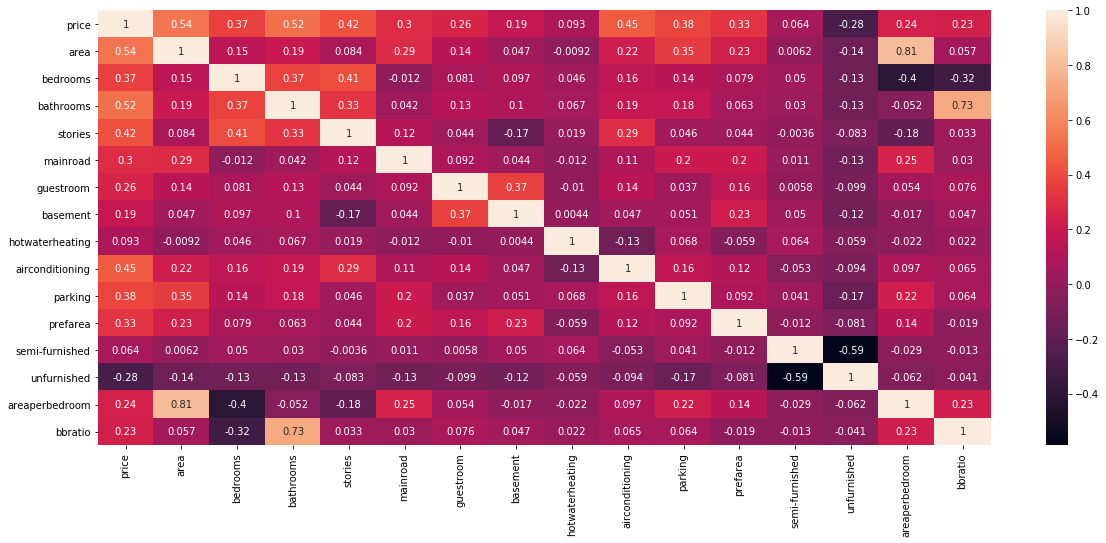

In [91]:
plt.figure(figsize=(20,8))
sns.heatmap(housing.corr(),annot=True)

In [92]:
X_train = X_train.drop("bbratio",axis = 1)
X_train.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished,areaperbedroom
359,1.0,0.134021,0.4,0.000000,0.000000,1.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,1.0,0.131693
19,1.0,0.327835,0.4,0.333333,0.333333,1.0,0.0,0.0,0.0,1.0,0.333333,1.0,1.0,0.0,0.282843
159,1.0,0.103093,0.4,0.333333,0.000000,1.0,1.0,1.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.107574
35,1.0,0.367698,0.4,0.333333,1.000000,1.0,0.0,0.0,0.0,1.0,0.666667,0.0,0.0,0.0,0.313930
28,1.0,0.432990,0.8,0.333333,0.333333,1.0,0.0,1.0,1.0,0.0,0.666667,0.0,0.0,1.0,0.194404


In [93]:
lm_2 = sm.OLS(y_train, X_train).fit()

print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.674
Method:                 Least Squares   F-statistic:                     57.03
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           6.46e-83
Time:                        13:24:29   Log-Likelihood:                 384.31
No. Observations:                 381   AIC:                            -738.6
Df Residuals:                     366   BIC:                            -679.5
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0799      0.036     

In [94]:
vif_cal(housing.drop(["bbratio"],axis = 1), "price")

,Var,Vif
0,area,20.72
13,areaperbedroom,18.44
1,bedrooms,10.03
4,mainroad,7.46
3,stories,2.78
11,semi-furnished,2.48
12,unfurnished,2.20
6,basement,2.03
9,parking,2.00
8,airconditioning,1.77


In [95]:
X_train = X_train.drop("bedrooms",axis =1)

lm_3 = sm.OLS(y_train, X_train).fit()

print(lm_3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.684
Model:                            OLS   Adj. R-squared:                  0.673
Method:                 Least Squares   F-statistic:                     61.23
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           1.66e-83
Time:                        13:24:30   Log-Likelihood:                 383.55
No. Observations:                 381   AIC:                            -739.1
Df Residuals:                     367   BIC:                            -683.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0427      0.018     

In [96]:
vif_cal(housing.drop(["bedrooms","bbratio"],axis = 1), "price")

,Var,Vif
0,area,14.98
12,areaperbedroom,13.88
3,mainroad,6.10
2,stories,2.56
10,semi-furnished,2.04
8,parking,2.00
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.72
1,bathrooms,1.69


In [97]:
X_train = X_train.drop("areaperbedroom",axis =1)

lm_4 = sm.OLS(y_train, X_train).fit()

print(lm_4.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     65.20
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.35e-83
Time:                        13:24:30   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -735.9
Df Residuals:                     368   BIC:                            -684.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0313      0.017     

In [98]:
vif_cal(housing.drop(["bedrooms","bbratio","areaperbedroom"],axis = 1), "price")

,Var,Vif
3,mainroad,5.51
0,area,4.43
2,stories,2.32
10,semi-furnished,2.00
8,parking,1.99
5,basement,1.90
7,airconditioning,1.76
11,unfurnished,1.65
1,bathrooms,1.62
9,prefarea,1.50


In [99]:
X_train = X_train.drop("semi-furnished",axis =1)

lm_5 = sm.OLS(y_train, X_train).fit()

print(lm_5.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           2.73e-84
Time:                        13:24:30   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0319      0.015     

In [100]:
vif_cal(housing.drop(["bedrooms","bbratio","areaperbedroom", "semi-furnished"],axis = 1), "price")

,Var,Vif
3,mainroad,4.85
0,area,4.36
2,stories,2.30
8,parking,1.99
5,basement,1.86
7,airconditioning,1.75
1,bathrooms,1.62
9,prefarea,1.49
4,guestroom,1.47
10,unfurnished,1.34


In [101]:
X_train = X_train.drop("basement",axis =1)

lm_6 = sm.OLS(y_train, X_train).fit()

print(lm_6.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.676
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     77.18
Date:                Thu, 18 Jun 2020   Prob (F-statistic):           3.13e-84
Time:                        13:24:31   Log-Likelihood:                 378.51
No. Observations:                 381   AIC:                            -735.0
Df Residuals:                     370   BIC:                            -691.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0390      0.015     

In [102]:
vif_cal(housing.drop(["bedrooms","bbratio","areaperbedroom", "semi-furnished", "basement"],axis = 1), "price")

,Var,Vif
3,mainroad,4.58
0,area,4.36
2,stories,2.21
7,parking,1.99
6,airconditioning,1.75
1,bathrooms,1.59
8,prefarea,1.44
9,unfurnished,1.34
4,guestroom,1.29
5,hotwaterheating,1.08


In [103]:
X_testm6 = sm.add_constant(X_test)

X_testm6 = X_testm6.drop(["bedrooms","bbratio","areaperbedroom", "semi-furnished", "basement"], axis =1)

y_predm6 = lm_6.predict(X_testm6)

Text(0, 0.5, 'Price')

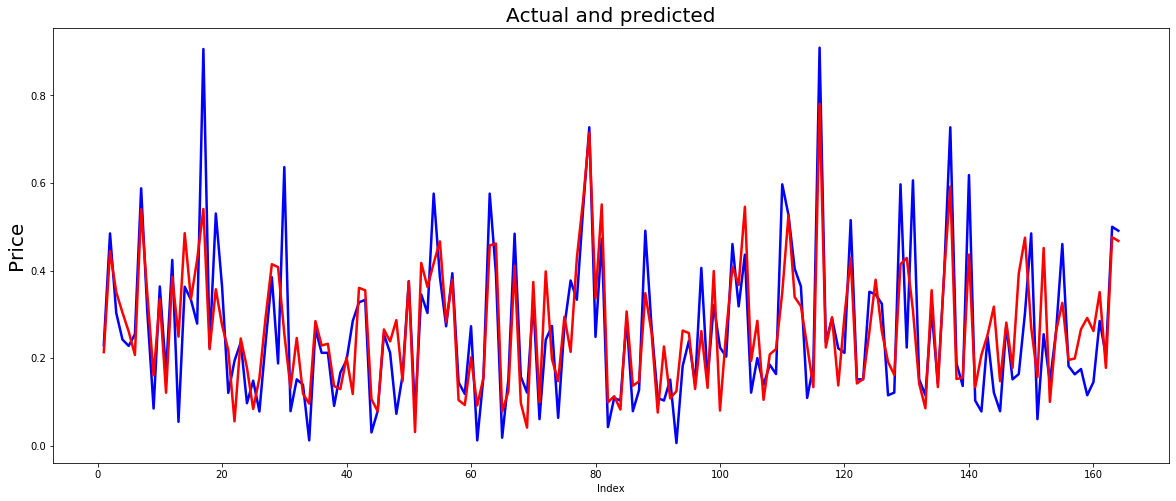

In [106]:
plt.figure(figsize=(20,8))

c = [i for i in range (1,165)]

plt.plot(c,y_test, color ="blue", linewidth=2.5)
plt.plot(c,y_predm6, color ="red", linewidth=2.5)
plt.title("Actual and predicted", fontsize=20)
plt.xlabel("Index")
plt.ylabel("Price", fontsize=20)

Text(0, 0.5, 'y_pred')

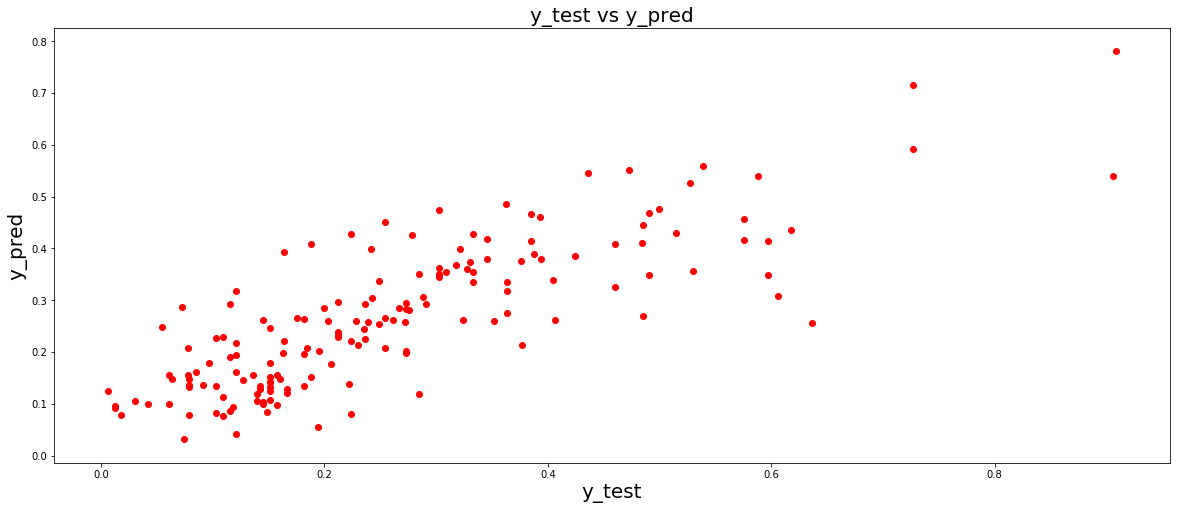

In [108]:
plt.figure(figsize=(20,8))

plt.scatter(y_test, y_predm6, color= "red")
plt.title("y_test vs y_pred", fontsize=20)
plt.xlabel("y_test", fontsize=20)
plt.ylabel("y_pred", fontsize=20)

Text(0, 0.5, 'Error')

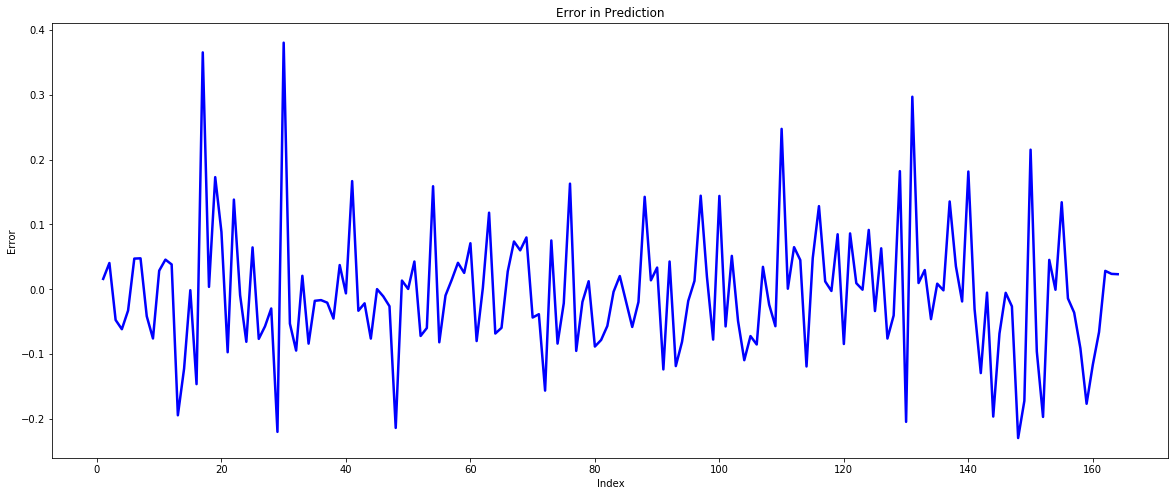

In [109]:
plt.figure(figsize=(20,8))
plt.plot(c, y_test-y_predm6, color="blue", linewidth=2.5)
plt.title("Error in Prediction")
plt.xlabel("Index")
plt.ylabel("Error")

In [110]:
from sklearn.metrics import mean_squared_error, r2_score
print("Mean squared error: ",mean_squared_error(y_test, y_predm6))
print("R square value: ", r2_score(y_test, y_predm6))

Mean squared error:  0.010002184792935636
R square value:  0.660134403021964
